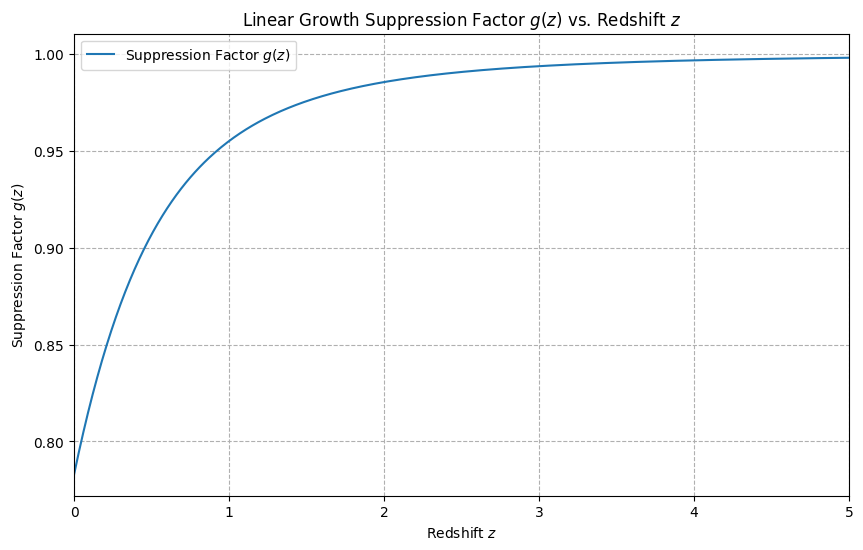

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck15 as cosmo

# Fiducial cosmological parameters from Planck 2015
Omega_M0 = cosmo.Om0
Omega_Lambda0 = cosmo.Ode0

def E(z, Omega_M0, Omega_Lambda0):
    return np.sqrt(Omega_M0 * (1 + z)**3 + Omega_Lambda0)

def Omega_M(z, Omega_M0, Omega_Lambda0):
    return Omega_M0 * (1 + z)**3 / E(z, Omega_M0, Omega_Lambda0)**2

def Omega_Lambda(z, Omega_Lambda0, E_z):
    return Omega_Lambda0 / E_z**2

def g_z(z, Omega_M0, Omega_Lambda0):
    E_z = E(z, Omega_M0, Omega_Lambda0)
    Omega_M_z = Omega_M(z, Omega_M0, Omega_Lambda0)
    Omega_Lambda_z = Omega_Lambda(z, Omega_Lambda0, E_z)
    numerator = 5 * Omega_M_z
    denominator = 2 * (Omega_M_z**(4/7) - Omega_Lambda_z + (1 + 0.5 * Omega_M_z) * (1 + 1/70 * Omega_Lambda_z))
    return numerator / denominator

# Redshift range
z = np.linspace(0, 10, 1000)
g = g_z(z, Omega_M0, Omega_Lambda0)

# Plot g(z) vs z
plt.figure(figsize=(10, 6))
plt.plot(z, g, label='Suppression Factor $g(z)$')
plt.xlabel('Redshift $z$')
plt.ylabel('Suppression Factor $g(z)$')
plt.title('Linear Growth Suppression Factor $g(z)$ vs. Redshift $z$')
#plt.xscale('log')
#plt.yscale('log')
plt.gca().invert_xaxis()
plt.legend()
plt.grid(True, which='both', ls='--')
plt.xlim(0,5)
plt.show()
